<a href="https://colab.research.google.com/github/David-GHMM/ML-LAB2/blob/main/%D0%9C%D0%9E_%D0%9B%D0%A02_%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D1%80%D1%8F%D0%BD_%D0%9F%D0%98%D0%9D_231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 2
# Визуальный анализ данных

**Цель работы:** изучить программные средства, используемые для визуализации
наборов данных.

Набор данных включает следующие атрибуты:
* **Age** – возраст клиента
* **Employment Type** – сектор, в котором работает клиент
* **Graduate Or Not** – независимо от того, окончил клиент колледж или нет
* **Annual Income** – годовой доход клиента (округлено до ближайших 50 тыс.)
* **Family Members** – количество членов семьи клиента
* **Chronic Disease** – страдает ли клиент какими-либо серьезными заболеваниями
или состояниями (диабет, высокое артериальное давление, астма и т.д.)
* **Frequent Flyer** – данные о часто летающих пассажирах, полученные на основе
истории бронирования авиабилетов клиентом как минимум в 4 различных случаях за
последние 2 года (2017–2019).
* **Ever Travelled Abroad** – выезжал ли клиент когда-либо в другую страну (не
обязательно с использованием услуг компании)
* **Travel Insurance** – приобретал ли клиент туристический страховой пакет во
время ознакомительного предложения, проведенного в 2019 г. (целевая переменная)

### 1. Импортируем необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Импортируем набор данных из файла Travel.csv и поместим его в объект DataFrame

In [3]:
data = pd.read_csv("Travel.csv", index_col=0)
data.head(10)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,33,Government Sector,Yes,800000,3,0,Yes,No,0


### 3. Получим сводную информацию по датафрейму

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


### 4. Визуализация количественных признаков

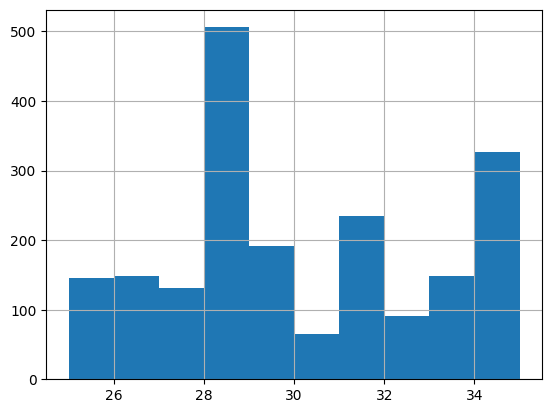

In [5]:
data['Age'].hist();

Изменим размер фигуры и применим метод hist() для визуализации распределения нескольких признаков:

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualIncome'}>],
       [<Axes: title={'center': 'FamilyMembers'}>,
        <Axes: title={'center': 'ChronicDiseases'}>],
       [<Axes: title={'center': 'TravelInsurance'}>, <Axes: >]],
      dtype=object)

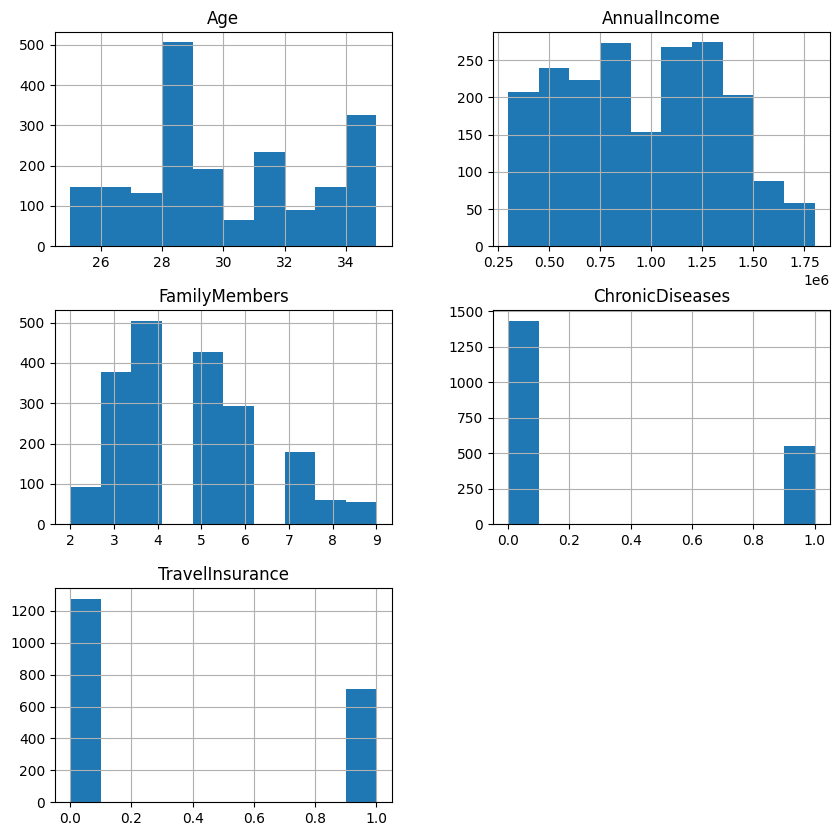

In [6]:
data.hist(figsize=(10, 10))

Аналогичный тип графика можно получить с использованием matplotlib:

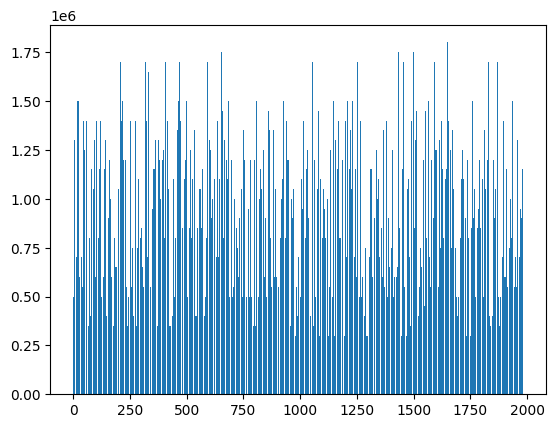

In [7]:
plt.bar(data.index, data['AnnualIncome'])
plt.show()

График распределения:

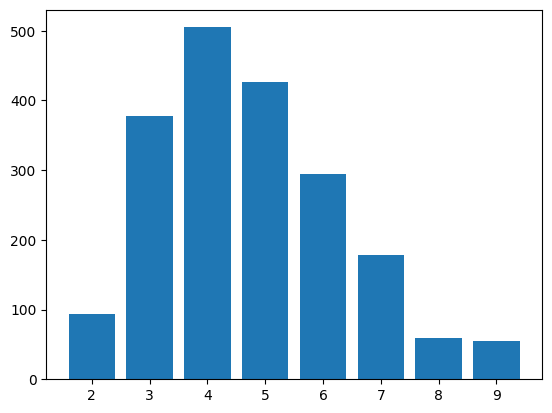

In [8]:
hist = data['FamilyMembers'].value_counts()
plt.bar(hist.index, hist);

Использование библиотеки Seaborn для построения диаграммы типа "ящик с усами"

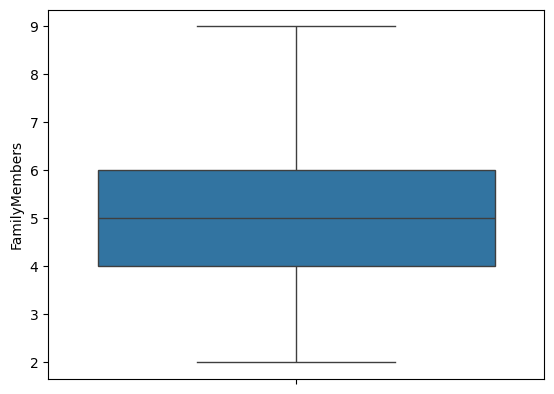

In [9]:
sns.boxplot(data['FamilyMembers']);

Ниже представлен код и результат построения графиков для анализа зарплат клиентов по каждому сектору, в котором они работают.

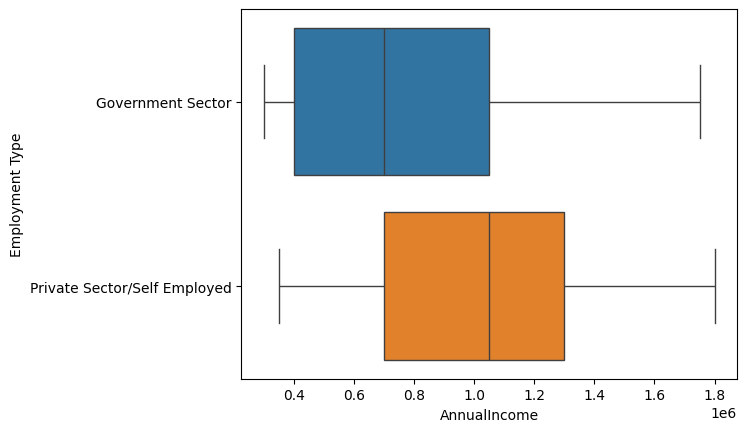

In [10]:
sns.boxplot(y='Employment Type', x='AnnualIncome', data=data, hue='Employment Type');

### 5. Визуализация категориальных признаков

Визуализация категориальных признаков:

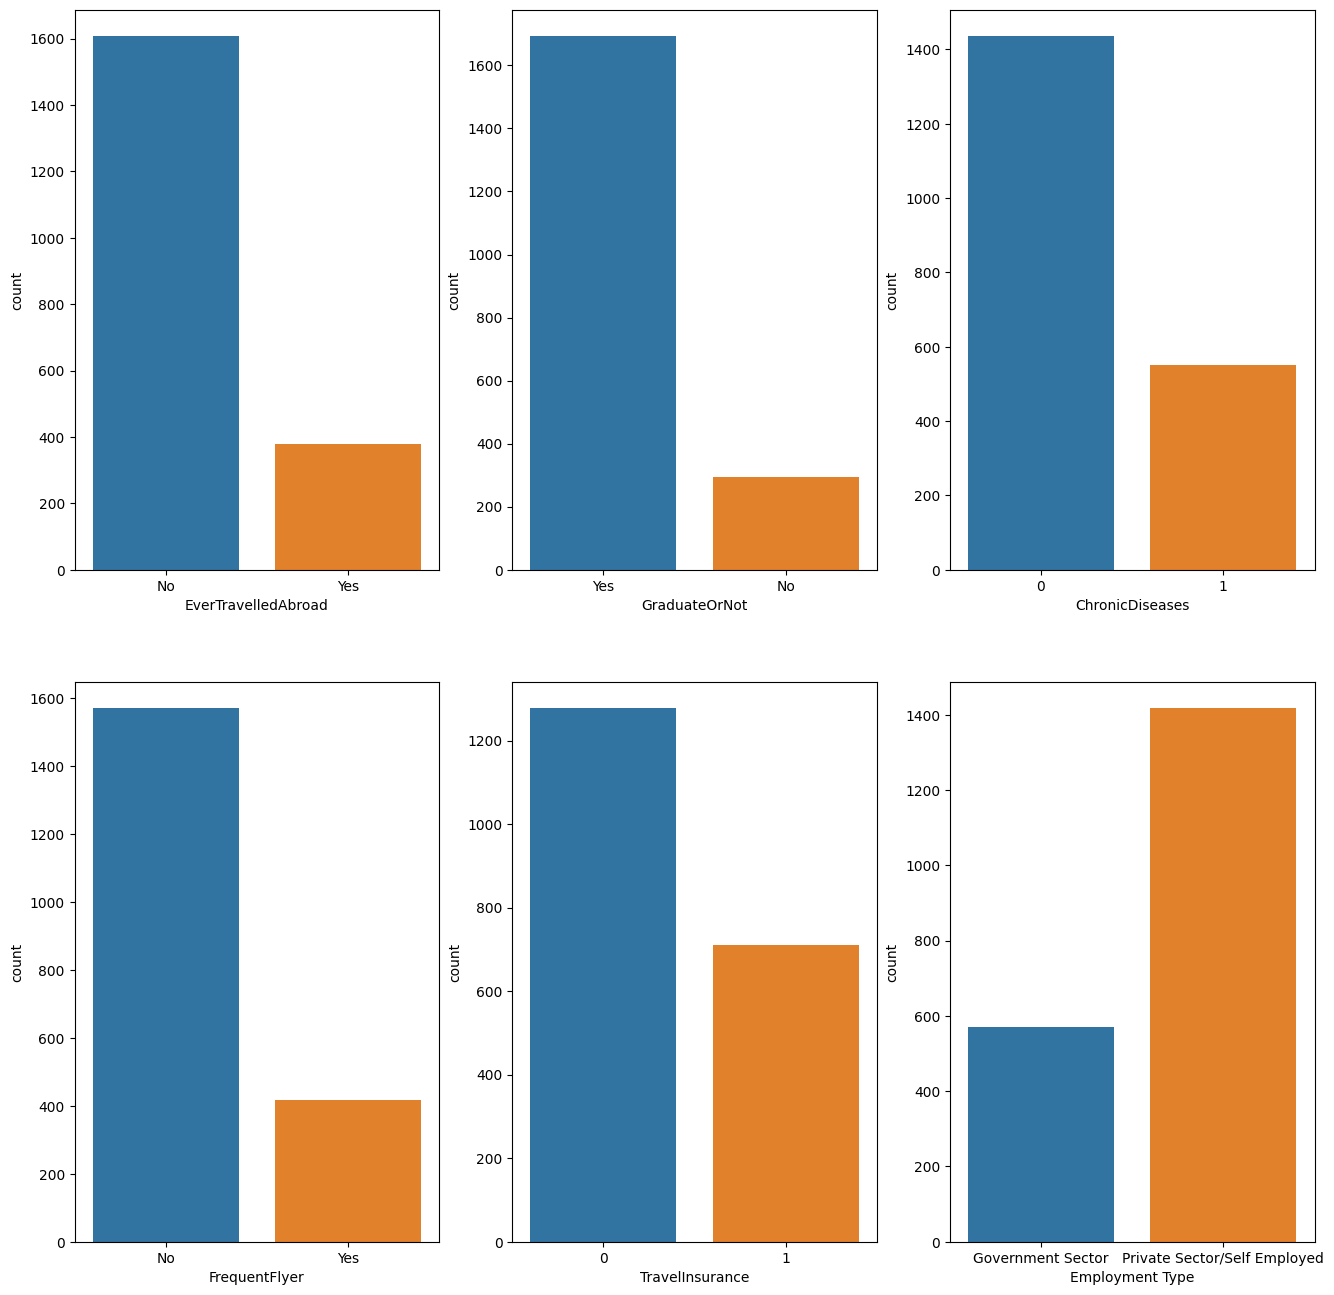

In [17]:
fig1, (axes1, axes2) = plt.subplots(ncols=3, nrows=2, figsize=(16, 16))

sns.countplot(data, x="EverTravelledAbroad", hue="EverTravelledAbroad", ax=axes1[0])
sns.countplot(data, x="GraduateOrNot", hue="GraduateOrNot", ax=axes1[1])
sns.countplot(data, x="ChronicDiseases", hue="ChronicDiseases", ax=axes1[2], legend=False)
sns.countplot(data, x="FrequentFlyer", hue="FrequentFlyer", ax=axes2[0])
sns.countplot(data, x="TravelInsurance", hue="TravelInsurance", ax=axes2[1], legend=False)
sns.countplot(data, x="Employment Type", hue="Employment Type", ax=axes2[2])
plt.show()

Гистограмма, показывающая 5 самых распространненых возрастов среди клиентов туристической компании:

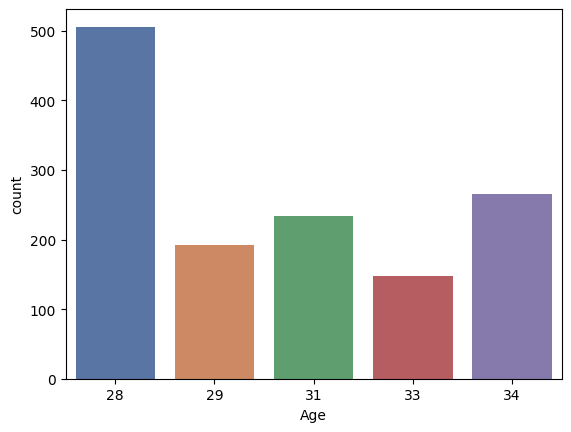

In [12]:
# За неимением "небинарных" категориальных признаков использую признак Age
sns.countplot(data[data['Age'].isin(data['Age'].value_counts().head(5).index)],
              x='Age', hue='Age', palette='deep', legend=False)
plt.show()

Гистограмма для всех возрастов:

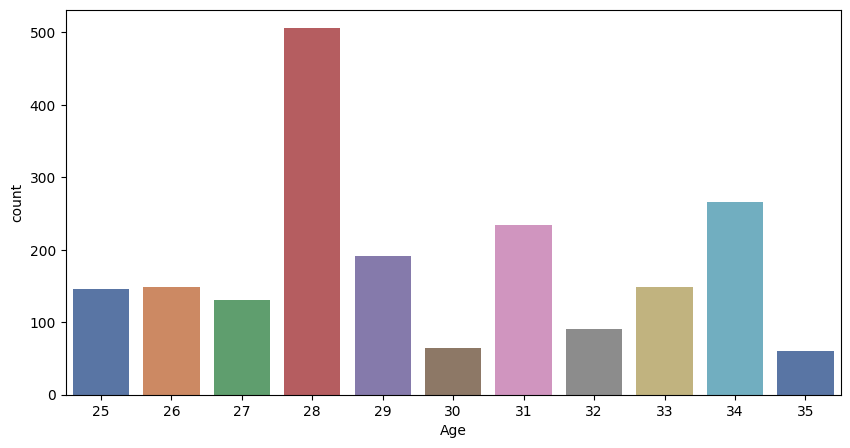

In [13]:
plt.subplots(figsize = (10,5))
sns.countplot(data, x='Age', hue='Age', palette="deep", legend=False)
plt.show()

Определение первых n "популярных" возрастов

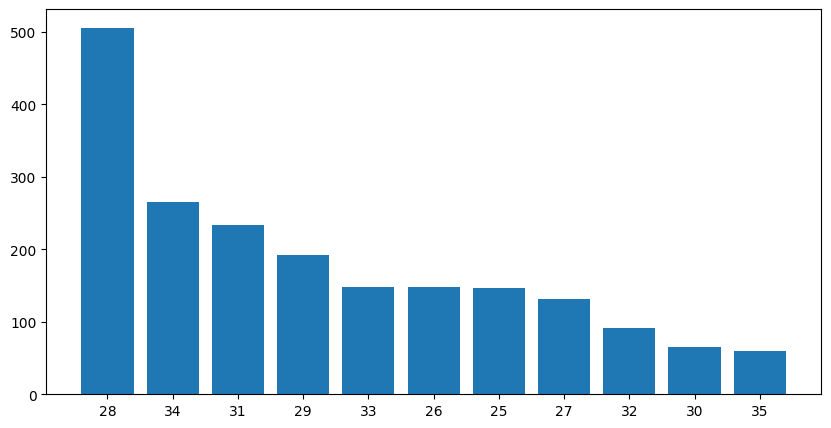

In [14]:
plt.figure(figsize=(10, 5))
hist = data['Age'].value_counts()

# Т.к. Age некатегориальный признак
# Преобразую индекс в строки, чтобы сохранить порядок по убыванию
plt.bar(hist.index.astype("str"), hist)
plt.show()

Попарное распределение признаков:

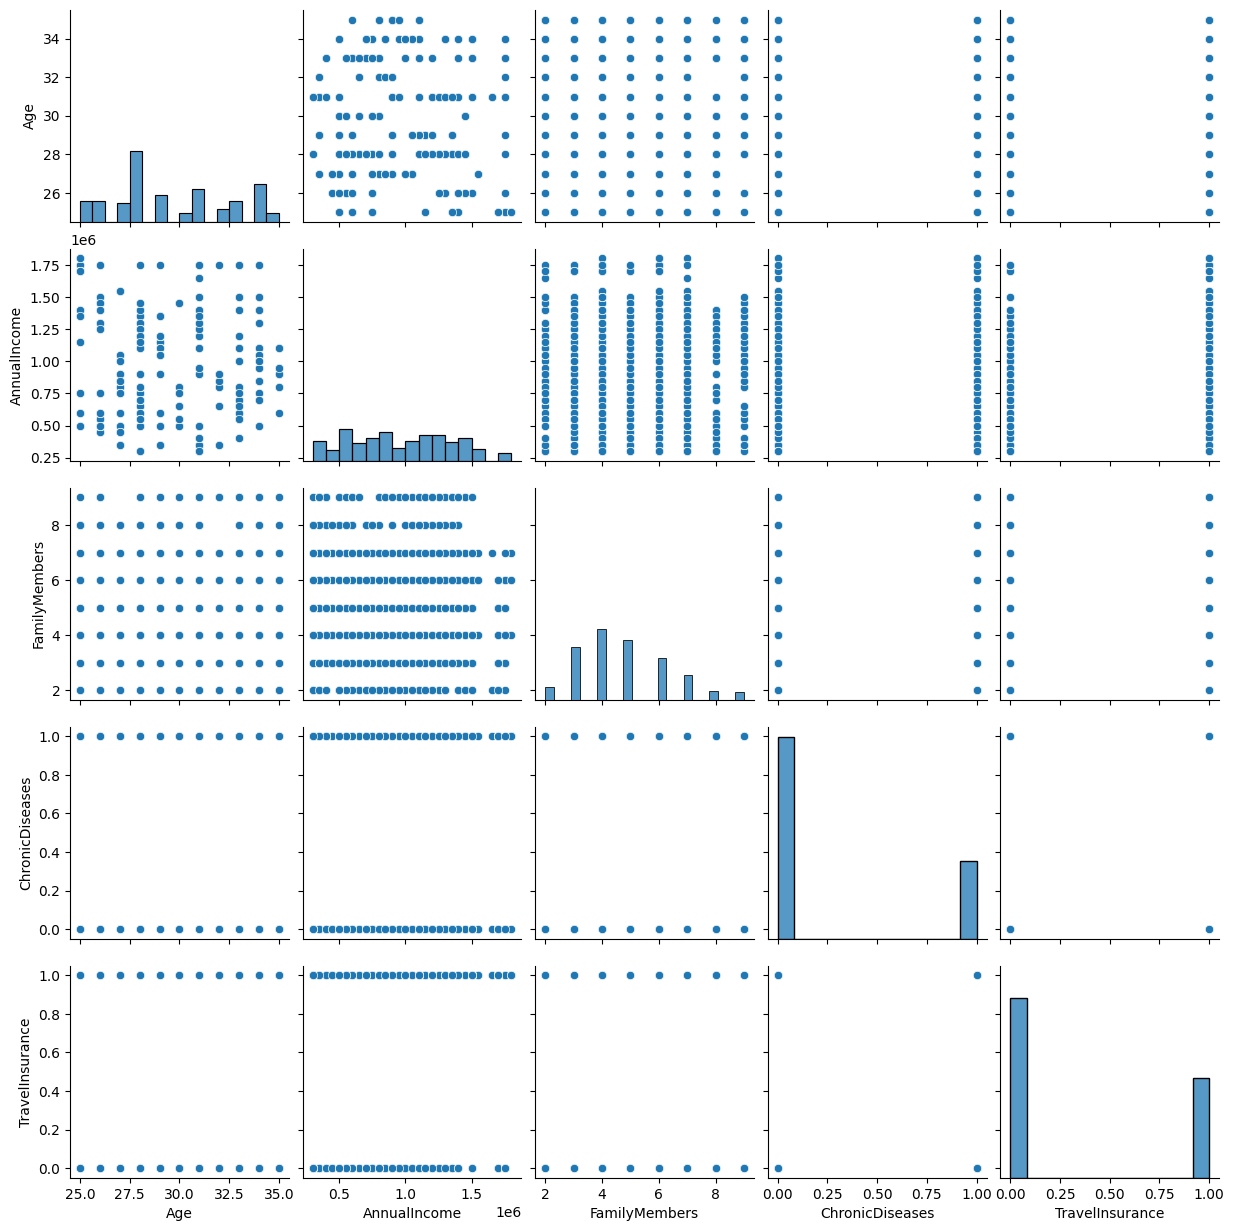

In [15]:
sns.pairplot(data);

Добавление целевого признака:

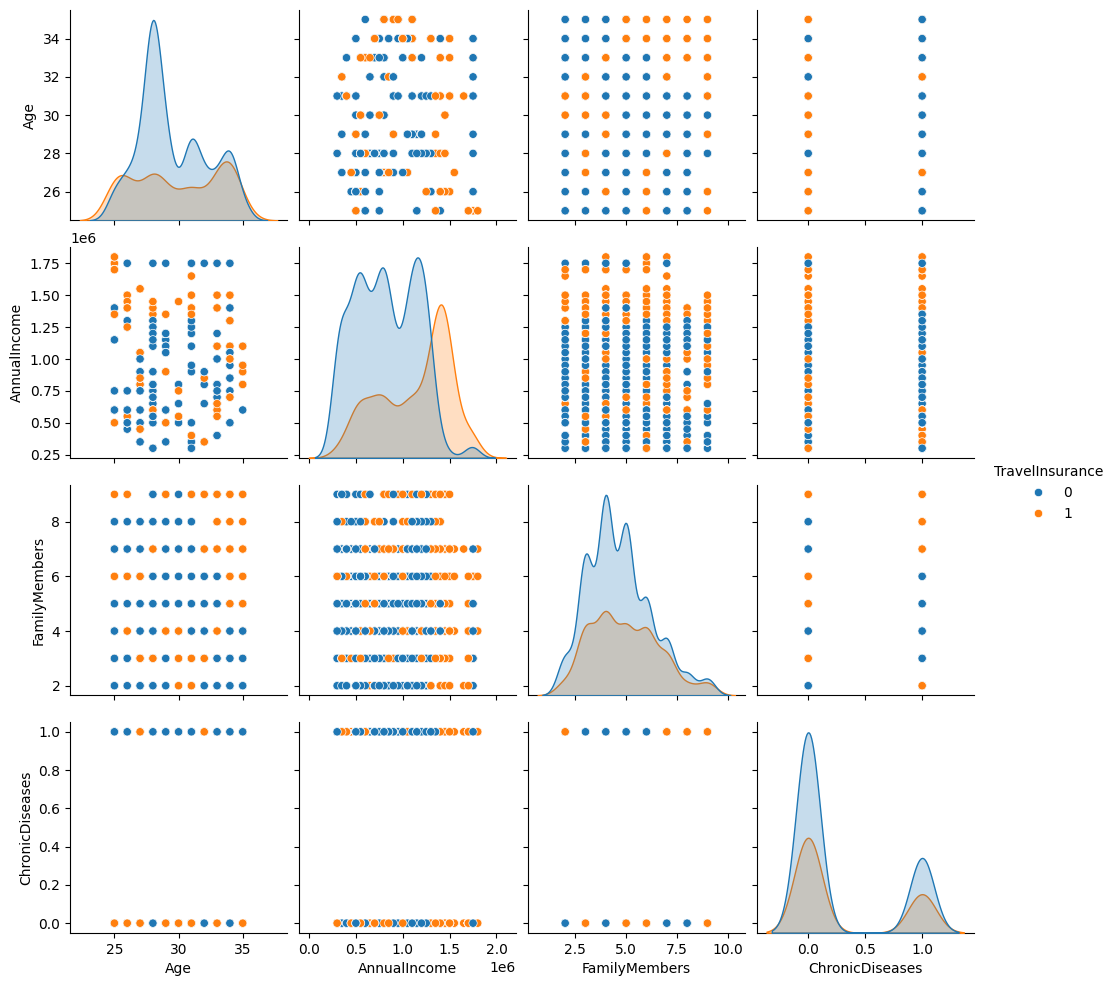

In [56]:
sns.pairplot(data, hue="TravelInsurance");

Использование matplotlib, подписей данных, заголовков. Использование простейших пользовательских цветов:


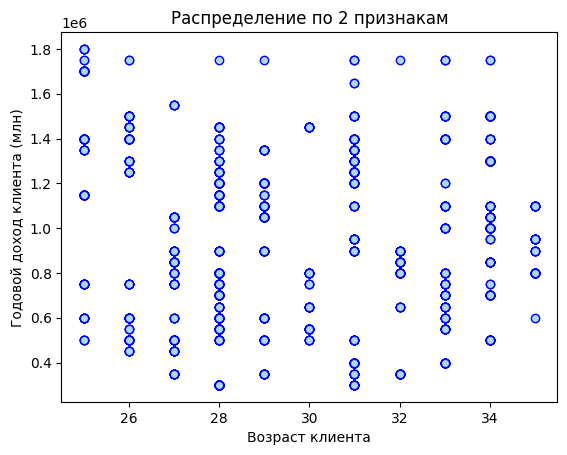

In [55]:
plt.scatter(data['Age'],
            data['AnnualIncome'],
            color='lightblue', edgecolors='blue')

plt.xlabel('Возраст клиента')
plt.ylabel('Годовой доход клиента (млн)')
plt.title('Pаспределение по 2 признакам');

Раскрашивание данных

Цвет в зависимости от того, есть ли образование у клиента:

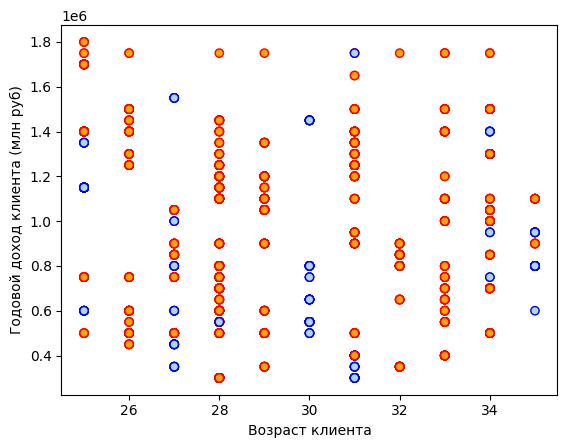

In [35]:
c = data['GraduateOrNot'].map({'No': 'lightblue', 'Yes': 'orange'})
edge_c = data['GraduateOrNot'].map({'No': 'blue', 'Yes': 'red'})
# Настройка графика
plt.scatter(data['Age'], data['AnnualIncome'], color=c, edgecolors=edge_c)
plt.xlabel('Возраст клиента')
plt.ylabel('Годовой доход клиента (млн руб)');

Раскраска часто летающих клиентов и добавление легенды:

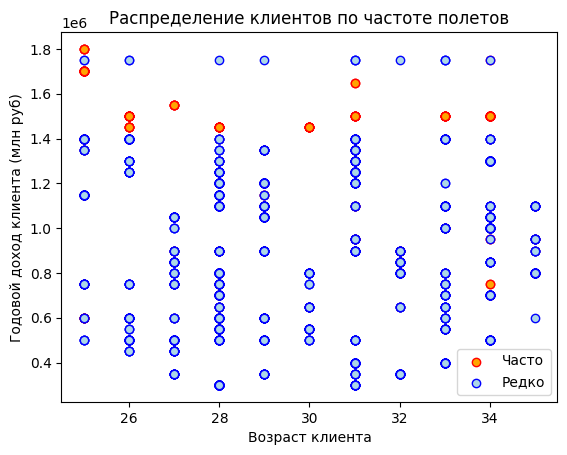

In [45]:
data_freq = data[data['FrequentFlyer'] == 'Yes']
data_nofreq = data[data['FrequentFlyer'] == 'No']

plt.scatter(data_freq['Age'], data_freq ['AnnualIncome'],
            color='orange', edgecolors='red', label='Часто')

plt.scatter(data_nofreq['Age'], data_nofreq['AnnualIncome'],
            color='lightblue', edgecolors='blue', label='Редко')

plt.xlabel('Возраст клиента')
plt.ylabel('Годовой доход клиента (млн руб)')
plt.title('Pаспределение клиентов по частоте полетов')
plt.legend(loc='best');

### 6. Корреляция признаков

In [50]:
data.corr(numeric_only=True)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000


Строим heatmap:

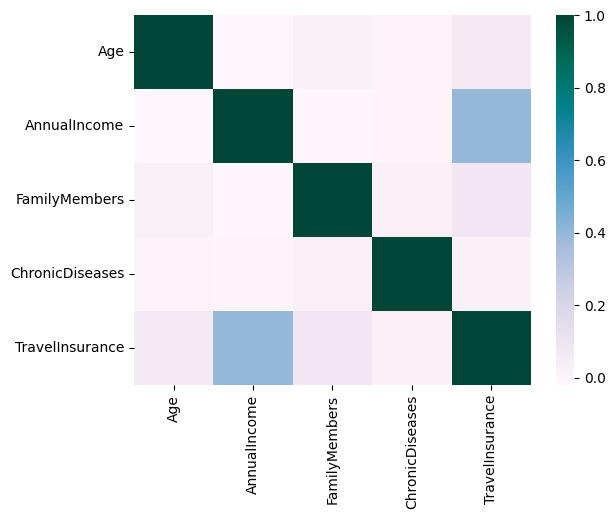

In [52]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn);

Коррелирующие признаки обычно удаляются и не рассматриваются в процессе обучения.

Но из карты heatmap видно, что **сильно** коррелирующих признаков нет, поэтому удаление не требуется.